# **Machine Learning < Hello World />**

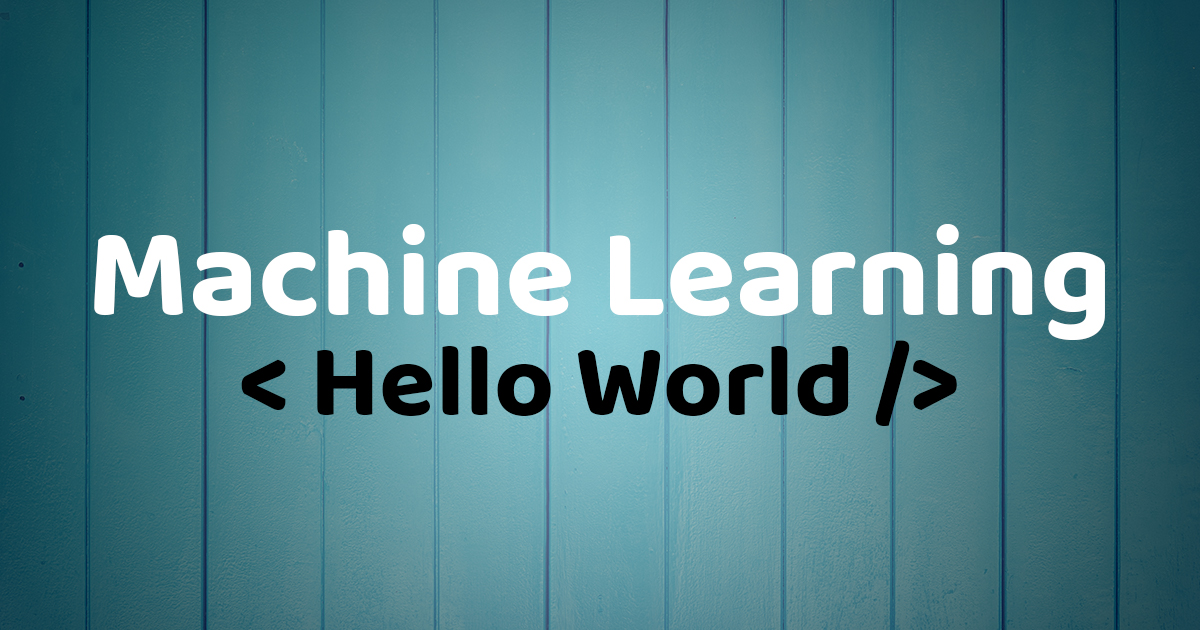

A **Hello World** program is a small piece of code that outputs or displays the message "Hello, world!". It is used to illustrate a language's basic syntax. These programs are often the first a student learns to write in a given language. For instance, here is an example program in the 1978 book [The C Programming Language](https://en.wikipedia.org/wiki/The_C_Programming_Language), prints "hello, world":

```
main( ) {
    printf("hello, world");
}
```
Since this is your first machine learning project, it's good to start with something simple that shows the overall approach. In other words, you will tackle the Hello World of Machine Learning by working through a small, end-to-end project in Python.


Here is an overview of what you are going to cover:

1. Import Project Libraries
2. Load the Dataset
3. Summarize the Dataset
4. Visualize the Dataset
5. Train and Validate the Model
6. Evaluate Model Predictions
7. Putting It All Together


## 1) Import Project Libraries

In this step, import all of the specific modules, functions and objects you are going to use.

In [ ]:
# Import Project Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Everything should load without error, which mens there should be nothing output from this step.


## 2) Load the Dataset

Now it's time to load your data using `pandas`

In [ ]:
# Load dataset
path = "https://raw.githubusercontent.com/tindytech/biai/main/data/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(path, names=names)

# Print the first 5 rows
print(dataset.head())

After running the above step, you should see the first 5 rows of the dataset.  

The data was read from the comma separated value file `iris.csv` into a dataframe named `dataset` using the [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#) function.  

The parameters passed to `read_csv` in this example are described as follows:
* `path` filepath or buffer
* `names` list of column names to use for the data

## 3) Summarize the Dataset

Now it's time to take a look at the data, which can be done in a few different ways:

* Peek at the data itself
* Discover the shape (dimensions) of the data
* Get a statistical summary of each attribute
* Examine the class distribution

### 3.1) Peek at the Data

You've already seen how the ``.head()`` function can let you see the first 5 rows of your data.  

However, you can also specify the number of rows you wish to see as a parameter.

In [ ]:
print(dataset.head(20))

After execution, you should see the first 20 rows of the data.

Feel free to modify the code to get a look at even more records by replacing `20` with a different number of rows, e.g., ``60``.  

It is a common practice in machine learning projects to examine your data.

### 3.2) Discover its Shape

In [ ]:
print(dataset.shape)

There are 150 instances and 5 attributes in the iris dataset.

### 3.3) Get a Statistical Summary

You can compute the count, mean, min, and max values, as well as some percentiles for each attribute.




In [ ]:
print(dataset.describe())

### 3.4) Examine the Class Distribution

In [ ]:
print(dataset.groupby('class').size())

Each class in the iris dataset has the same number of instances, i.e. 50.

In other words, the class distribution is balanced with each of the 3 classes containing 33% of the dataset.

## 4) Visualize the Dataset

Now that you have a basic idea about the data, you can extend that knowledge with some visualizations.

You'll learn about two types of plots:
*   Univariate plots to better understand each attribute.
*   Multivariate plots to better understand the relationships between attributes.





### 4.1) Univariate Plots

A univariate plot shows the data and summarizes its distribution.

Given that the input variables of the Iris dataset are numeric, you can visualize their distribution as:
 * **Box Plots**, also known as Box and Whisker Plots.
 * **Histograms**.

In [ ]:
# Box Plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

You can read a box and whisker plot above as follows:
* At the ends of the box, from the bottom up, you'll find the first quartile (25% mark) and the third quartile (75% mark). 
* At the end of the bottom whisker is the minimum or smallest number in the set.
* At the end of the top whisker is the maximum or largest number in the set.

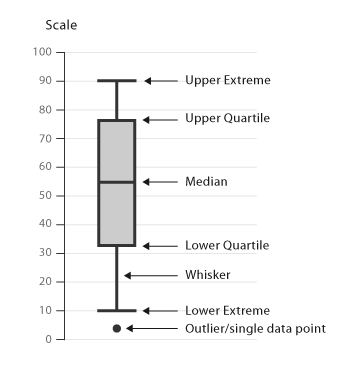

Note that box whisker plots can be drawn either vertically or horizontally. 

In [ ]:
# Histograms
dataset.hist()
pyplot.show()

Looking at the histograms, it appears that two of the input variables have a Normal (Gaussian) Distribution. 

This is useful to note as you can try algorithms that can exploit this assumption.

### 4.2) Multivariate Plots

Multivariate plots look at interactions between the variables.  

For example, you can draw scatterplots of all pair of attributes to spot structured relationships between input variables.

In [ ]:
# Scatter Plot Matrix
scatter_matrix(dataset)
pyplot.show()

Note the diagonal grouping of some pairs of attributes. 

This suggests a high correlation and a predictable relationship.

## 5) Train and Validate the ML Model

Now it's time to train ML models using some of the data and estimate the accuracy of model predictions during training when the models are given previously unseen data.

The training process you are going to use is described as follows:
*   Split the dataset into two parts: a training set and a test set.
*   Spot check algorithms using k-fold cross validation.
*   Select the best algorithm and fit model to training data.
*   Make predictions using test data and evaluate model performance.



### 5.1) Split the Dataset

During the ML training process, you will want to hold back some of the data so the algorithms do not get to see it.

You can then use the previously unseen data to evaluate how well the model may perform when making predictions in the real world.

It is common practice to split the data set **80/20**.

*   Use 80% to **train**, **validate**, and **choose** the best model. 

*   Hold back 20% to provide a final estimate of the model's performance after it has been trained and validated.  Sometimes referred to as the **holdout** or **test** set.  

In [ ]:
# Split the Dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

You should now have the following:

*   `X_train` and `Y_train` for preparing models
*   and `X_test` and `Y_test` for testing them later



### 5.2) Spot Check Algorithms

It is not clear which algorithms may be good for this problem, or which configurations to use.

In such situations, you can spot check different algorithms using stratified k-fold cross-validation.  

Here is a good mixture of algorithms you can try:
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)

In [ ]:
# Set Up Models for Spot Checking
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Validate Each Model using K-Fold Cross-Validation
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

You should now have six models and accuracy estimations for each.

Note that your results may vary from the instructor and other course participants due to the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision.

### 5.3) Select and Train (Fit) the Model

The next step is to compare the models to each other and select the most accurate.

* From the calculation above it appears that Support Vector Machines (SVM) has the largest estimated accuracy of about **0.98** or **98%**.  

* However, there is a population of accuracy measures for the algorithms since each algorithm was evaluated 10-fold cross-validation i.e., `n_splits=10`

A useful way to compare and visualize the result samples for each algorithm is to create a Box plot for each distribution.

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

You can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

The results suggest that SVM was perhaps the most accurate model, and so you will use it for your final model.



In [ ]:
# Fit the model on the training data
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

## 6) Evaluate Model Predictions

In [ ]:
# Make predictions using the test data
predictions = model.predict(X_test)

# Evaluate and report on model performance
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

The model performance summary provides:

* A final accuracy score (approximately 97%).
* A **confusion matrix** showing the results for true and false predictions.
* A full classification report containing values for the **precision**, **recall**, and **f-scores**.

## 7) Put It All Together: Assignment

**Congratulations!** You've just completed your first end-to-end machine learning project. At this point, it is okay to have even more questions than when you first started. Questions like:

*   What is meant by class, classification, and class distribution?
*   How did the code for splitting the dataset actually split it?
*   How exactly does k-fold cross-validation work? 
*   How do you interpret the numbers in the confusion matrix?
*   What is precision, recall, and f-score? and how do they measure performance?

Remember, the goal of this first project was to go through all the steps and see the results. As you progress in the course, you'll gradually build up your ML knowledge and skills so that everything that has been done here is well-understood. But for now, you have one final task which represents your first assignment.  

**Assignment Instructions**:

In the code block below you are going to create a single script that performs the end-to-end machine learning process using all the code from Steps 1-6 (including substeps).

1.   Fill in your name and today's date in the space provided.

2.   Type or copy-paste the code from each section into the code block below. Good code is well-documented, so I have gone ahead and placed comments for the high-level steps and done Step 1 for you.

3.   Once the script is complete, execute it to make sure that it works and does not produce any errors.

4.   Copy the contents of the completed script into a text editor and save it as ```helloworld.py```.

5.   Upload your ```helloworld.py``` script to the course portal.





In [ ]:
# Assignment: Machine Learning Hello World
# Name:
# Date:

# Step 1: Import Project Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Step 2: Load the Dataset


# Step 3: Summarize the Dataset


# Step 4: Visualize the Dataset


# Step 5: Train and Validate the ML Model


# Step 6: Evaluate Model Predictions

